# **Uni-variate forecasting framework using NBEATS in pytorch.**

In [2]:
# import packages
!pip install nbeats_forecast
import numpy as np
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
import datetime
from nbeats_forecast import NBeats
from torch import optim
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [ ]:
# dataset loading
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/dataset50/0.csv",index_col = 0)

# converting numeric timestamps to datetime64[ns]
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data.head()

,value,timestamp
0,46.9182,1970-01-19 11:08:43.800
1,46.9255,1970-01-19 11:08:47.400
2,46.9373,1970-01-19 11:08:51.000
3,46.9441,1970-01-19 11:08:54.600
4,46.9644,1970-01-19 11:08:58.200


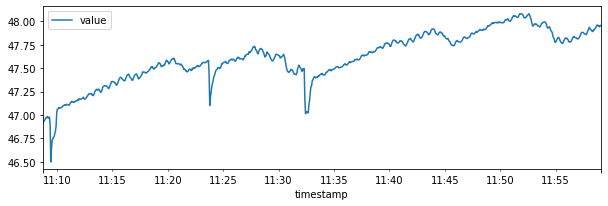

In [ ]:
#plotting the time series
data.plot(figsize = (10,3),x='timestamp')
plt.show()

In [ ]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]

size = int(len(data)*0.75) #75% training and 25% testing
train,val = train_test_split(data,size)

In [ ]:
# model training
model = NBeats(data = train.value.values.reshape((-1,1)), period_to_forecast=len(val),backcast_length=len(val),stack=[2,3],nb_blocks_per_stack=3,thetas_dims=[2,5])
model.fit(epoch=10,optimiser=optim.AdamW(model.parameters, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False))

prediction = model.predict(predict_data=val.value.values.reshape((-1,1))) # predicting on the 25% test data

| N-Beats
| --  Stack Trend (#0) (share_weights_in_stack=False)
     | -- TrendBlock(units=128, thetas_dim=2, backcast_length=210, forecast_length=210, share_thetas=True) at @140191168716176
     | -- TrendBlock(units=128, thetas_dim=2, backcast_length=210, forecast_length=210, share_thetas=True) at @140191168714448
     | -- TrendBlock(units=128, thetas_dim=2, backcast_length=210, forecast_length=210, share_thetas=True) at @140191168714192
| --  Stack Seasonality (#1) (share_weights_in_stack=False)
     | -- SeasonalityBlock(units=128, thetas_dim=5, backcast_length=210, forecast_length=210, share_thetas=True) at @140191168713296
     | -- SeasonalityBlock(units=128, thetas_dim=5, backcast_length=210, forecast_length=210, share_thetas=True) at @140191168557328
     | -- SeasonalityBlock(units=128, thetas_dim=5, backcast_length=210, forecast_length=210, share_thetas=True) at @140191168559824


/usr/local/lib/python3.7/dist-packages/nbeats_pytorch/model.py:86: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  T = torch.tensor([t ** i for i in range(p)]).float()


grad_step = 000030, tr_loss = 0.161856, te_loss = 2.241501
grad_step = 000060, tr_loss = 0.023964, te_loss = 2.241501
grad_step = 000090, tr_loss = 0.000600, te_loss = 2.241501
grad_step = 000120, tr_loss = 0.000125, te_loss = 0.000306
grad_step = 000150, tr_loss = 0.000115, te_loss = 0.000306
grad_step = 000180, tr_loss = 0.000114, te_loss = 0.000306
grad_step = 000210, tr_loss = 0.000113, te_loss = 0.000167
grad_step = 000240, tr_loss = 0.000113, te_loss = 0.000167
grad_step = 000270, tr_loss = 0.000112, te_loss = 0.000167
grad_step = 000300, tr_loss = 0.000112, te_loss = 0.000167
grad_step = 000330, tr_loss = 0.000111, te_loss = 0.000165
grad_step = 000360, tr_loss = 0.000111, te_loss = 0.000165
grad_step = 000390, tr_loss = 0.000110, te_loss = 0.000165
grad_step = 000420, tr_loss = 0.000109, te_loss = 0.000164
grad_step = 000450, tr_loss = 0.000109, te_loss = 0.000164
grad_step = 000480, tr_loss = 0.000108, te_loss = 0.000164
grad_step = 000510, tr_loss = 0.000108, te_loss = 0.0001

In [ ]:
# Model Evaluation Metrics

test = val['value']
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(test,prediction)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(test,prediction)))
print("Root Mean Squared Error {:.2f}".format(np.sqrt(mean_squared_error(test,prediction))))

Mean Absolute Error 0.71
Mean Squared Error 0.71
Root Mean Squared Error 0.84


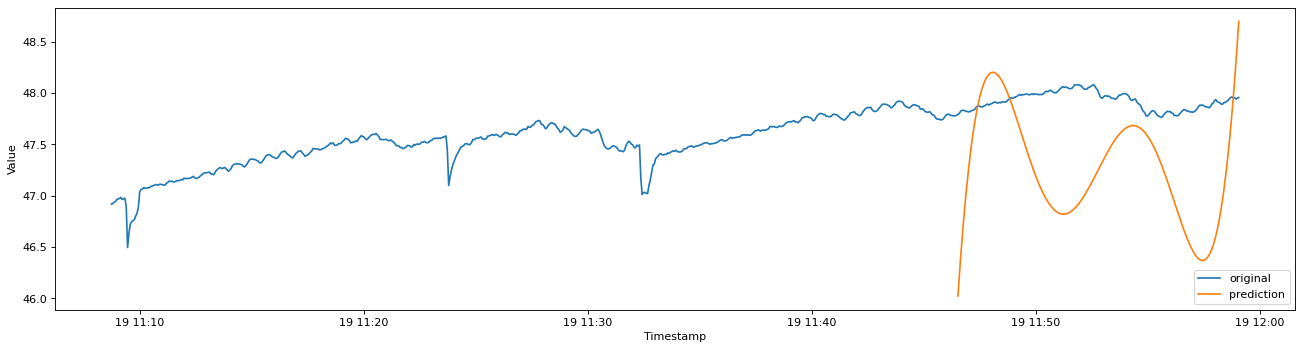

In [ ]:
# Forecast Plot
x = data.timestamp.values
y = data.value.values

plt.figure(figsize=(20, 5), dpi=80)
plt.plot(x,y,label="original")
plt.plot(x[len(train):],prediction,label="prediction")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend(["original", "prediction"], loc ="lower right")